[-4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -3. -3. -3. -3. -3.
 -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3.
 -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -2. -2. -2. -2.
 -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.
 -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.
 -2. -2. -2. -2. -2. -2. -2. -2. -2. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

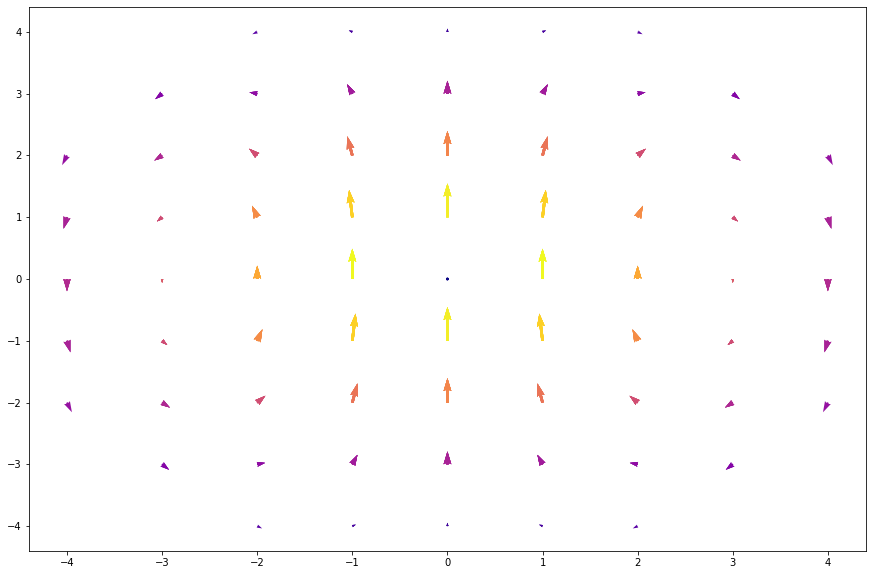

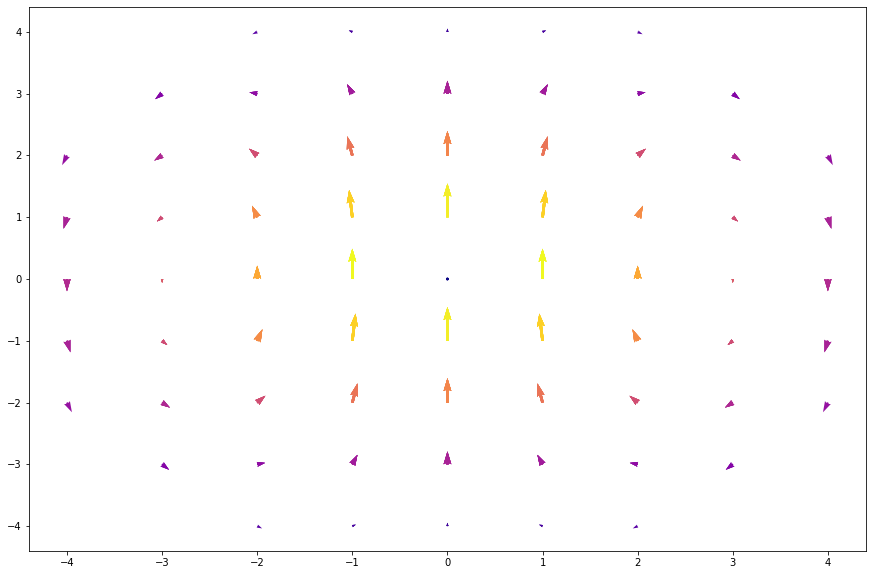

/tmp/ipykernel_4068/3270214724.py:97: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


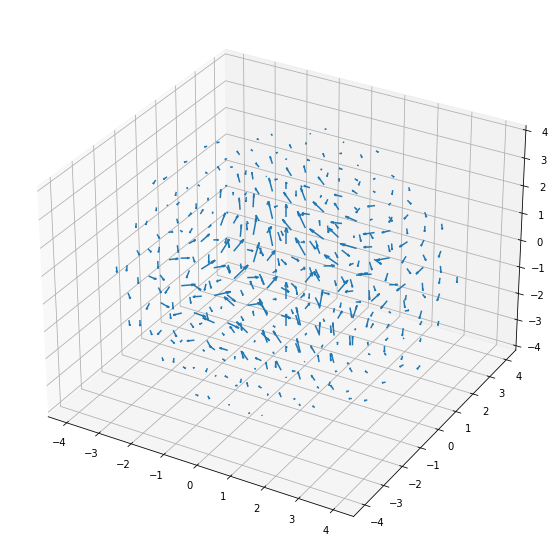

-0.2236432081773158


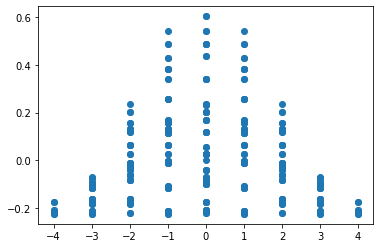

In [107]:
import numpy as np
from matplotlib import pylab as plt
from matplotlib.colors import Colormap as cmp
#make function for spheromak
#free parameters: B0, Alpha, X0, Y0, Z0, Orient
#Strength, radius, center, Orientation
Orient = 'z'
B0 = 1
Alpha = 1
X0=0
Y0=0
Z0=0
#returns B vector at a given point

def spheromak_internal(x,y,z):
    #set orientation
    if Orient == 'z':
        pass
    elif Orient == 'x':
        z,x = x,z  #swap z and x
    elif Orient == 'y':
        y,z = z,y  #swap z and y
    #initialise return vector
    B_ret = [0,0,0]
    #define x,y,z relative to center and radius
    x = x-X0
    y = y-Y0
    z = z-Z0+1e-20
    r = np.sqrt(x**2+y**2+z**2)
    #defne output by components:
    Bx = (1/(Alpha*r**5))*(z*Alpha*(-3*x*r+Alpha*x**2*y*r/(np.sqrt(z**2))+y*Alpha*(y**2+z**2)*r/(np.sqrt(z**2)))*np.cos(r*Alpha) -
                           z*(y*r*Alpha*r/(np.sqrt(z**2))+x**3*Alpha**2+x*(-3+y**2*Alpha**2+Alpha**2*z**2))*np.sin(r*Alpha))
    #swap x and y
    By = (1/(Alpha*r**5))*(z*Alpha*(-3*y*r+Alpha*y**2*x*r/(np.sqrt(z**2))+x*Alpha*(x**2+z**2)*r/(np.sqrt(z**2)))*np.cos(r*Alpha) -
                           z*(x*r*Alpha*r/(np.sqrt(z**2))+y**3*Alpha**2+y*(-3+x**2*Alpha**2+Alpha**2*z**2))*np.sin(r*Alpha))                
    Bz = (x**2+y**2-2*z**2)*np.cos(r*Alpha)/(r**4) + (2*z**2+x**4*Alpha**2+y**4*Alpha**2+y**2*(-1+z**2*Alpha**2)+x**2*(-1+2*y**2*Alpha**2+z**2*Alpha**2))*np.sinc(r*Alpha/np.pi)/(Alpha*r**4)
    #Bz =(-2*z**2)*np.cos(r*Alpha)/(r**4) +(2*z**2*np.sinc(r*Alpha/np.pi))/(Alpha*r**4) 
    B_ret = [Bx,By,Bz]
    return B_ret
def spheromak_external():
    #set orientation
    if Orient == 'z':
        pass
    elif Orient == 'x':
        z,x = x,z  #swap z and x
    elif Orient == 'y':
        y,z = z,y  #swap z and y    
    return B_ret
#plotting section
#3-d--------------------------------------------------------------
#fig = plt.figure(figsize = (10,10))
#ax = fig.gca(projection='3d')
#x, y, z = np.meshgrid(np.arange(-3, 3, 1.01), #avoid behavior at 0
#                      np.arange(-3, 3, 1.01),
#                      np.arange(-3, 3, 1.01))
#B_in = spheromak_internal(x,y,z) 
#u = B_in[0]
#v = B_in[1]
#w = B_in[2]
#ax.quiver(x,y,z, u,v, w, length=1)
#plt.show()
#2-d slice
X = np.arange(-5, 5, 1) #avoid behavior at 0
#Y = np.arange(-5, 5, .7)
Y=np.arange(-5,5,1)
Z = np.arange(-5, 5, 1)
#sort into inside and outside
xin=np.array([]);yin=np.array([]);zin=np.array([])
xout=np.array([]);yout=np.array([]);zout=np.array([])
for x in X:
    for y in Y:
        for z in Z:
            if np.sqrt(x**2+y**2+z**2)<4.5/Alpha:
                xin=np.append(xin,x)
                yin=np.append(yin,y)
                zin=np.append(zin,z)
            else:
                xout=np.append(xout,x)
                yout=np.append(yout,y)
                zout=np.append(zout,z)
print(xin)
#X projection
B_in = spheromak_internal(xin,0,zin)
B_mag = np.sqrt(B_in[0]**2+B_in[1]**2+B_in[2]**2)
fig, ax = plt.subplots(figsize=(15,10))
q = ax.quiver(xin, zin, B_in[0], B_in[2],B_mag,cmap='plasma', scale = 15)
plt.show()
#y projection
B_in = spheromak_internal(0,yin,zin)
B_mag = np.sqrt(B_in[0]**2+B_in[1]**2+B_in[2]**2)
fig, ax = plt.subplots(figsize=(15,10))
q = ax.quiver(yin, zin, B_in[1], B_in[2],B_mag,cmap='plasma', scale = 15)
plt.show()
#3-D
B_in = spheromak_internal(xin,yin,zin)
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection='3d')
B_mag = np.sqrt(B_in[0]**2+B_in[1]**2+B_in[2]**2)
q= ax.quiver(xin,yin,zin,B_in[0],B_in[1],B_in[2],cmap='hot')
plt.show()
#plt.scatter(xin,B_in[2])
plt.scatter(xin,B_in[2])
print(min(B_in[2]))